In [1]:
# import data
from sklearn import datasets
import pandas as pd
from rocm import rocm
from cpa import cpa
import uroc

boston = datasets.load_boston()
boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names
response = boston.target
print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [2]:
# select "RM" (average number of rooms per dwelling) as predictor
predictor = boston_pd["RM"]
print(cpa(response, predictor))

0.8227099325228195


100% (227 of 227) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


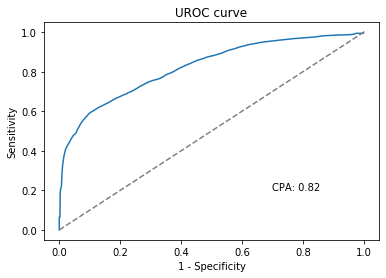

In [3]:
# compute and plot uroc curve
boston_uroc = uroc.uroc(response, predictor)
boston_uroc.plot()

In [4]:
# compute rocm 
rocm(response, predictor, "boston_rocm.gif", fps = 20)